In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time
from pathlib import Path
#from scipy.optimize import curve_fit
from tables import open_file

In [2]:
!tar -zxvf convDBSCAN_gamma_corsika_run1.npe.csv.tar.gz
!tar -zxvf DBSCAN_gamma_corsika_run1.npe.csv.tar.gz

convDBSCAN_gamma_corsika_run1.npe.csv
DBSCAN_gamma_corsika_run1.npe.csv


In [3]:
df_dbscan_conv = pd.read_csv('convDBSCAN_gamma_corsika_run1.npe.csv')
df_dbscan = pd.read_csv('DBSCAN_gamma_corsika_run1.npe.csv')
print(len(df_dbscan_conv))
print(len(df_dbscan))

12912
12912


Text(0, 0.5, 'energy, TeV')

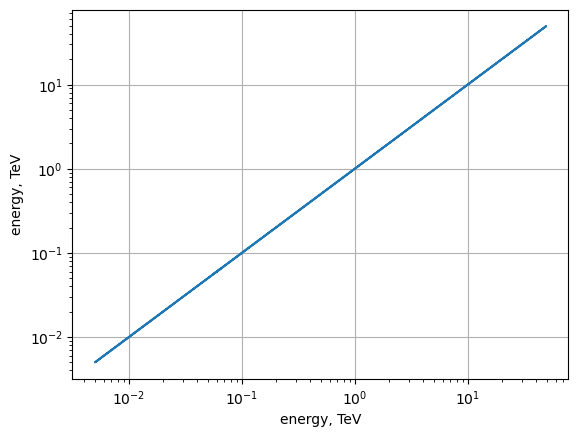

In [4]:
plt.plot(df_dbscan['energy'].values,df_dbscan_conv['energy'].values)
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('energy, TeV')
plt.ylabel('energy, TeV')

In [5]:
print(np.mean(df_dbscan['energy'].values-df_dbscan_conv['energy'].values))
print(np.std(df_dbscan['energy'].values-df_dbscan_conv['energy'].values))

0.0
0.0


In [6]:
# "standart" trigger (L1 - super flower digital sum) (L2 - conventional DBSCAN on isolated flower)
df_dbscan_trg_l1=df_dbscan[df_dbscan['L1_max_digi_sum_LST1']>14963]
df_dbscan_trg_l2=df_dbscan_trg_l1[df_dbscan_trg_l1['L3_iso_n_points_LST1']>7]

In [7]:
#trigger provided by convolve DBSCAN on isolated flower
df_dbscan_conv_trg=df_dbscan_conv[df_dbscan_conv['L3_iso_n_points_LST1']>0]

In [8]:
# trigger without L1. Only L2 - conventional DBSCAN on isolated flower
df_dbscan_trg_l2_only=df_dbscan[df_dbscan['L3_iso_n_points_LST1']>7]

# an "ideal" trigger conventional DBSCAN on flower
df_dbscan_trg_cl_only=df_dbscan[df_dbscan['L3_cl_n_points_LST1']>40]

In [9]:
print(len(df_dbscan_conv_trg))
print(len(df_dbscan_trg_l2))
print(len(df_dbscan_trg_l2_only))
print(len(df_dbscan_trg_cl_only))

3798
3192
3207
5118


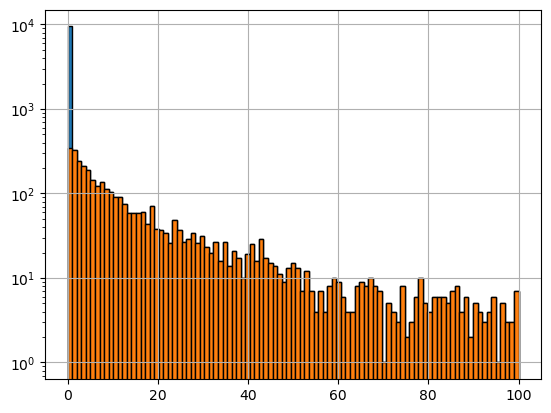

In [10]:
plt.hist(df_dbscan_conv['L3_iso_n_points_LST1'].values, bins=np.linspace(0.0, 100, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_conv_trg['L3_iso_n_points_LST1'].values, bins=np.linspace(0.0, 100, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')
plt.show()

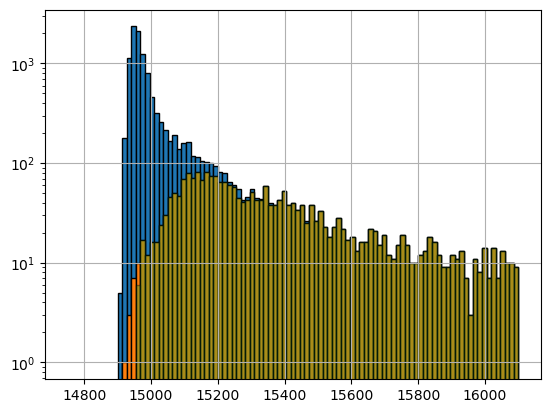

In [11]:
plt.hist(df_dbscan['L1_max_digi_sum_LST1'].values, bins=np.linspace(14750, 16100, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_l2_only['L1_max_digi_sum_LST1'].values, bins=np.linspace(14750, 16100, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_l2['L1_max_digi_sum_LST1'].values, bins=np.linspace(14750, 16100, num=100), edgecolor='black', alpha=0.4)
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

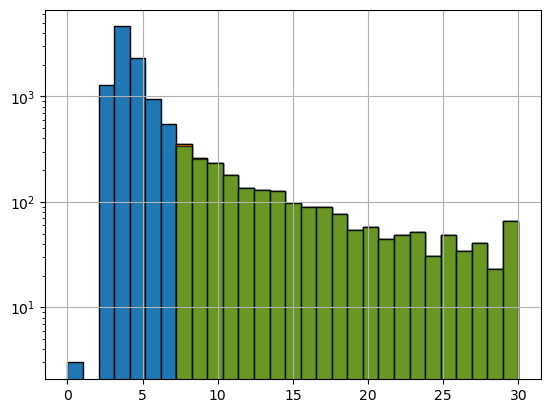

In [12]:
plt.hist(df_dbscan['L3_iso_n_points_LST1'].values, bins=np.linspace(0.0, 30, num=30), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_l2_only['L3_iso_n_points_LST1'].values, bins=np.linspace(0.0, 30, num=30), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_l2['L3_iso_n_points_LST1'].values, bins=np.linspace(0.0, 30, num=30), edgecolor='black', alpha=0.7)
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

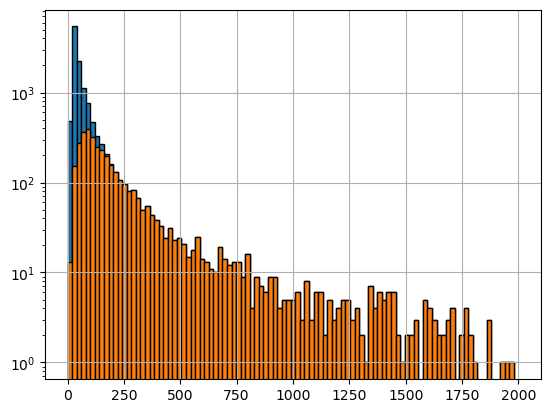

In [13]:
plt.hist(df_dbscan_conv['n_pe_LST1'].values, bins=np.linspace(0.0, 2000, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_conv_trg['n_pe_LST1'].values, bins=np.linspace(0.0, 2000, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

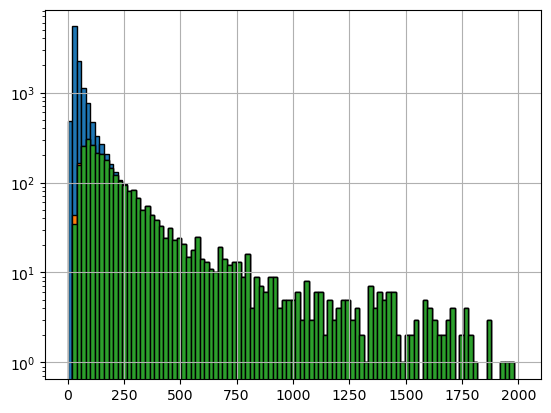

In [14]:
plt.hist(df_dbscan['n_pe_LST1'].values, bins=np.linspace(0.0, 2000, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_l2_only['n_pe_LST1'].values, bins=np.linspace(0.0, 2000, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_l2['n_pe_LST1'].values, bins=np.linspace(0.0, 2000, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

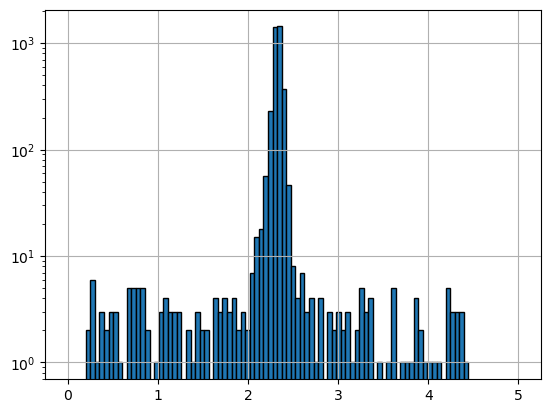

In [15]:
plt.hist(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.5, bins=np.linspace(0.0, 5.0, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')
plt.show()

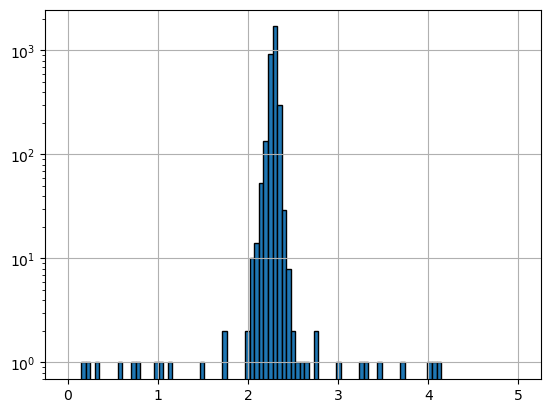

In [16]:
plt.hist(df_dbscan_trg_l2['L3_iso_t_mean_LST1'].values/1.5, bins=np.linspace(0.0, 5.0, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')
plt.show()

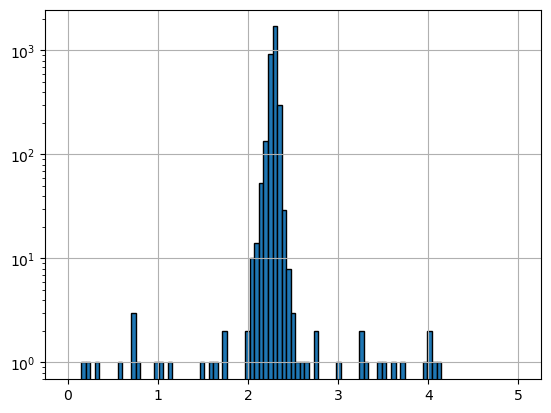

In [17]:
plt.hist(df_dbscan_trg_l2_only['L3_iso_t_mean_LST1'].values/1.5, bins=np.linspace(0.0, 5.0, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')
plt.show()

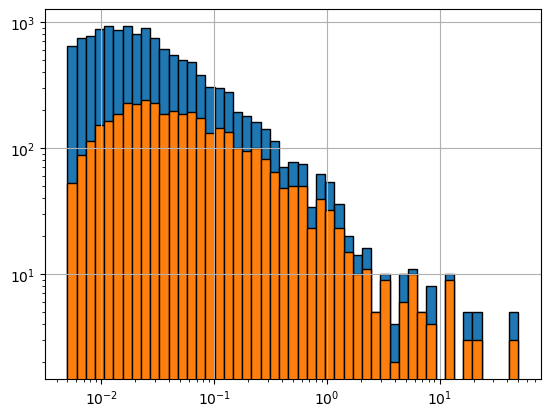

In [18]:
hist_energy_conv=plt.hist(df_dbscan_conv['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
hist_energy_conv_trg=plt.hist(df_dbscan_conv_trg['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

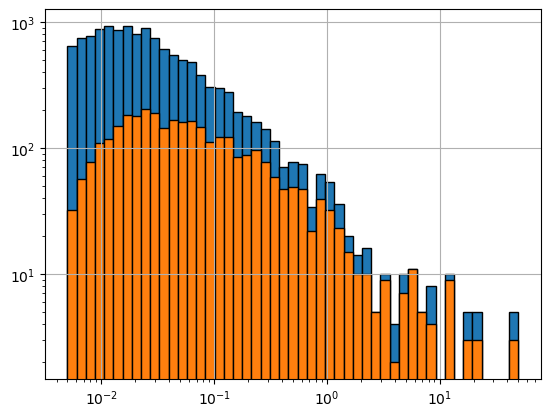

In [19]:
hist_energy=plt.hist(df_dbscan['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
hist_energy_trg_l2=plt.hist(df_dbscan_trg_l2['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

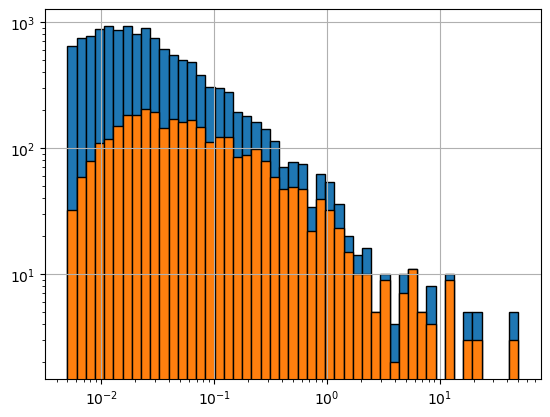

In [20]:
hist_energy=plt.hist(df_dbscan['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
hist_energy_trg_l2_only=plt.hist(df_dbscan_trg_l2_only['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

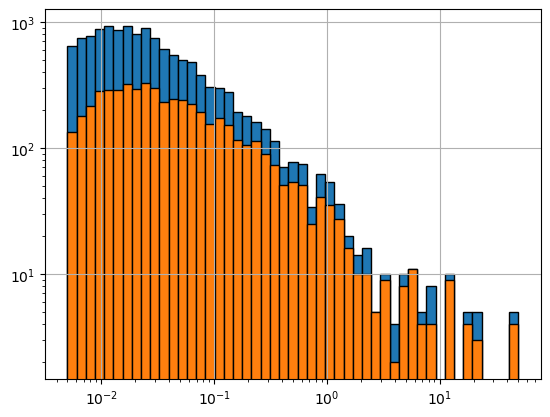

In [21]:
hist_energy=plt.hist(df_dbscan['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
hist_energy_trg_cl_only=plt.hist(df_dbscan_trg_cl_only['energy'].values, bins=np.logspace(np.log10(0.005),np.log10(50),50), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

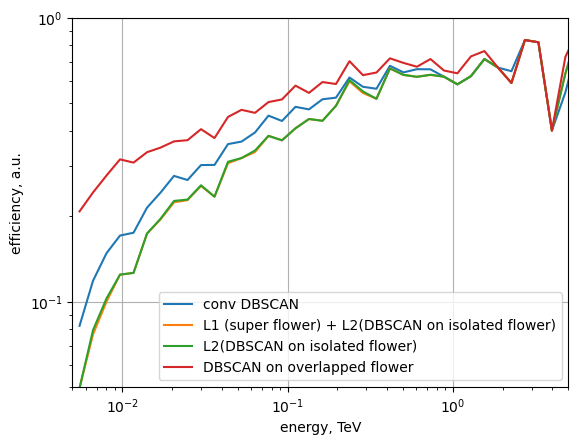

In [22]:
enetgy_conv = [(hist_energy_conv[1][i] + hist_energy_conv[1][i-1])/2.0 for i in range(1,len(hist_energy_conv[1]))]
eff_conv=hist_energy_conv_trg[0]/(hist_energy_conv[0]+1)
eff=hist_energy_trg_l2[0]/(hist_energy[0]+1)
eff_only=hist_energy_trg_l2_only[0]/(hist_energy[0]+1)
eff_cl_only=hist_energy_trg_cl_only[0]/(hist_energy[0]+1)
plt.plot(enetgy_conv,eff_conv,label='conv DBSCAN')
plt.plot(enetgy_conv,eff,label='L1 (super flower) + L2(DBSCAN on isolated flower)')
plt.plot(enetgy_conv,eff_only,label='L2(DBSCAN on isolated flower)')
plt.plot(enetgy_conv,eff_cl_only,label='DBSCAN on overlapped flower')
plt.grid(True)
plt.xlim(0.005, 5)
plt.ylim(0.05, 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy, TeV')
plt.ylabel('efficiency, a.u.')
plt.legend()

Text(0, 0.5, 'efficiency')

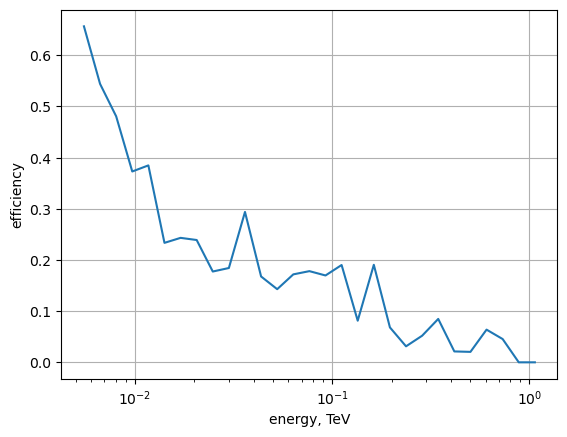

In [23]:
plt.plot(enetgy_conv[:-20],(eff_conv[:-20] - eff[:-20])/eff[:-20])
plt.grid(True)
#plt.xlim(0.005, 5)
#plt.ylim(0.05, 1)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('energy, TeV')
plt.ylabel('efficiency')

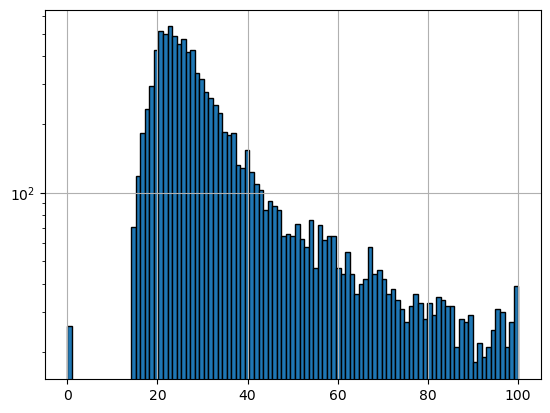

In [24]:
plt.hist(df_dbscan['L3_cl_n_points_LST1'].values, bins=np.linspace(0.0, 100, num=100), edgecolor='black', alpha=1.0)
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

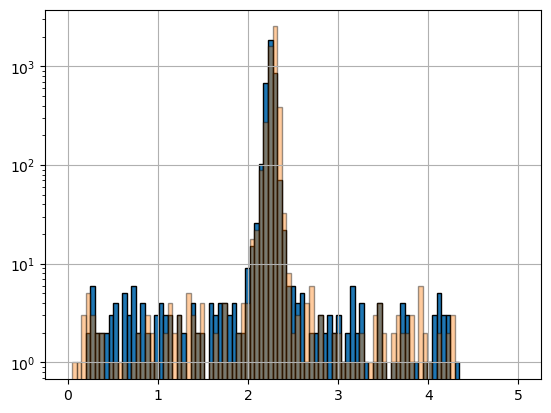

In [25]:
df_dbscan_trg_cl=df_dbscan[df_dbscan['L3_cl_n_points_LST1']>40]
#plt.hist(df_dbscan['L3_cl_t_mean_LST1'].values, bins=np.linspace(0.0, 5.0, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.55, bins=np.linspace(0.0, 5.0, num=100), edgecolor='black', alpha=1.0)
plt.hist(df_dbscan_trg_cl['L3_cl_t_mean_LST1'].values, bins=np.linspace(0.0, 5.0, num=100), edgecolor='black', alpha=0.4)
plt.grid(True)
plt.yscale('log')
plt.show()

In [26]:
np.sum(np.int64(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.55 > 2.7)) + np.sum(np.int64(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.55 < 1.7))- np.sum(np.int64(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.55 < 0.0))

146

In [27]:
np.sum(np.int64(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.55 > 1.7))- np.sum(np.int64(df_dbscan_conv['L3_iso_t_mean_LST1'].values/1.55 > 2.7))

3652

In [28]:
np.sum(np.int64(df_dbscan_trg_cl['L3_cl_t_mean_LST1'].values > 2.7)) + np.sum(np.int64(df_dbscan_trg_cl['L3_cl_t_mean_LST1'].values < 1.7))- np.sum(np.int64(df_dbscan_trg_cl['L3_cl_t_mean_LST1'].values < 0.0))

116

In [29]:
np.sum(np.int64(df_dbscan_trg_cl['L3_cl_t_mean_LST1'].values > 1.7))- np.sum(np.int64(df_dbscan_trg_cl['L3_cl_t_mean_LST1'].values > 2.7))

5002